### Carregar os dados

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [63]:
data_coupon1 = pd.read_csv('data/data_coupon1.csv', sep='|').set_index('Unnamed: 0')
data_coupon2 = pd.read_csv('data/data_coupon2.csv', sep='|').set_index('Unnamed: 0')
data_coupon3 = pd.read_csv('data/data_coupon3.csv', sep='|').set_index('Unnamed: 0')

In [64]:
data = data_coupon1.merge(data_coupon2, on=['orderTime', 'couponsReceived'])
data = data.merge(data_coupon3, on=['orderTime', 'couponsReceived'])

X = data.copy()
del X['coupon1Used']
del X['coupon2Used']
del X['coupon3Used']

In [65]:
y_coupon1 = data['coupon1Used']
y_coupon2 = data['coupon2Used']
y_coupon3 = data['coupon3Used']

In [66]:
def makeAccsKnn(X, y, test_values):
    accs = []
    best_k = 1
    maxi = 0.
    for k in test_values:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        scores = cross_val_score(knn, X, y, cv=10)
        acc = np.mean(scores)
        if(acc > maxi):
            maxi = acc
            best_k = k
        accs.append(acc)
    return accs, maxi, best_k

In [67]:
def plotAccKnn(X, y, test_values):
    accs, maxi, best_k = makeAccsKnn(X, y, test_values)
    plt.plot(test_values, accs)
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    plt.title('Acurácias por valores de K')
    plt.show()
    print('Maior acurácia: '+ str(maxi))
    print('Melhor k: '+ str(best_k))

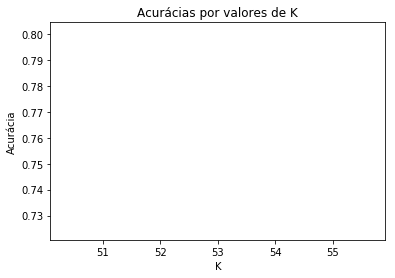

Maior acurácia: 0.76259445481
Melhor k: 53


In [68]:
plotAccKnn(X, y_coupon1, list(range(53, 55, 2)))

In [48]:
def makeAccsRf(X, y, test_values):
    accs = []
    best_e = 1
    maxi = 0.
    for e in test_values:
        rf = RandomForestClassifier(n_estimators=e, criterion="entropy", random_state=0, n_jobs=-1)
        scores = cross_val_score(rf, X, y, cv=10)
        acc = np.mean(scores)
        if(acc > maxi):
            maxi = acc
            best_e = e
        accs.append(acc)
    return accs, maxi, best_e

In [62]:
def plotAccRf(X, y, test_values):
    accs, maxi, best_e = makeAccsRf(X, y, test_values)
    plt.plot(test_values, accs)
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    plt.title('Acurácias por valores de e')
    plt.show()
    print('Maior acurácia: '+ str(maxi))
    print('Melhor e: '+ str(best_e))

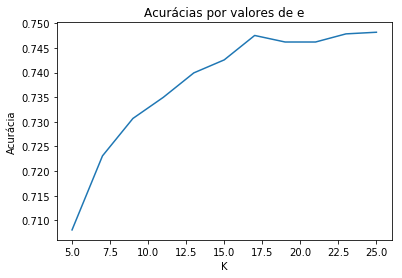

Maior acurácia: 0.748201411351
Melhor e: 25


In [72]:
plotAccRf(X, y_coupon1, list(range(5, 27, 2)))

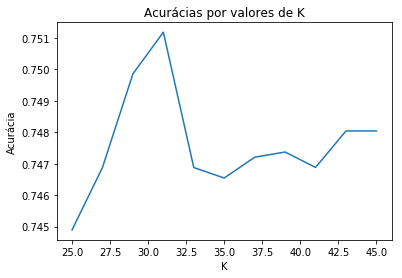

Maior acurácia: 0.751177443452
Melhor k: 31


In [53]:
plotAccRf(X, y_coupon1, list(range(25, 47, 2)))

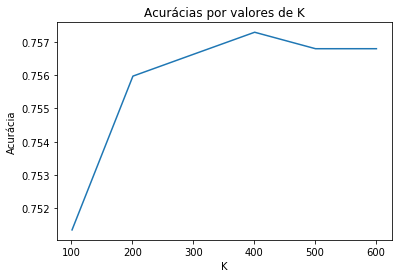

Maior acurácia: 0.757294525961
Melhor k: 401


In [54]:
plotAccRf(X, y_coupon1, list(range(101, 701, 100)))

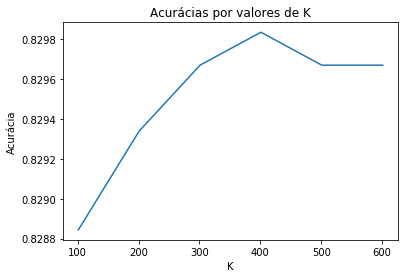

Maior acurácia: 0.829835343859
Melhor k: 401


In [55]:
plotAccRf(X, y_coupon3, list(range(101, 701, 100)))

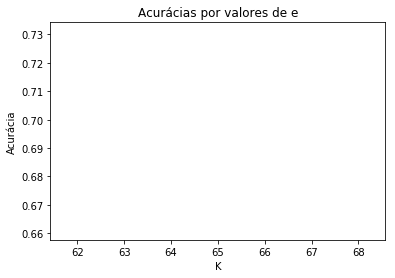

Maior acurácia: 0.695980010704
Melhor e: 65


In [69]:
X_coupon1 = data_coupon1.copy()
del X_coupon1['coupon1Used']
y = data_coupon1['coupon1Used']
plotAccRf(X_coupon1, y, list(range(65, 67, 2)))

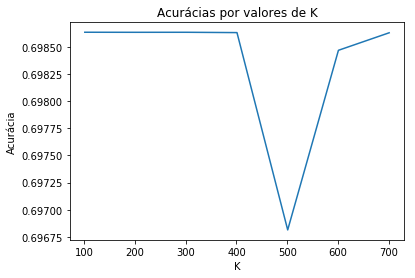

Maior acurácia: 0.6986352961
Melhor k: 101


In [60]:
plotAccRf(X_coupon1, y, list(range(101, 702, 100)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6053 entries, 0 to 6052
Columns: 234 entries, orderTime to categoryIDs1_f929d7624d13f00e1ca52c9edb5c03ba
dtypes: float64(234)
memory usage: 10.9 MB
